In [10]:
import seaborn as sns
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


In [11]:
df = pd.read_csv('bank_1.csv')
df.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [12]:
df.shape


(11162, 17)

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Text(0.5, 0, 'Target class')

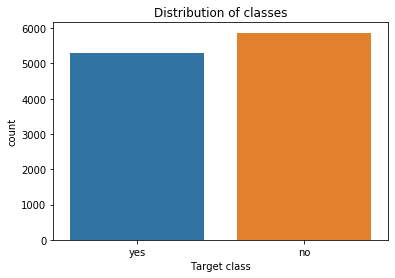

In [15]:
from matplotlib import pyplot as plt
sns.countplot(x=df['deposit'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [16]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

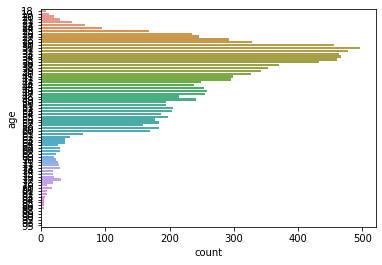

In [17]:
sns.countplot(y='age', data=df)

In [18]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, df.age.quantile(x/100)))

95% of people having age are less than equal to 61.0
96% of people having age are less than equal to 64.0
97% of people having age are less than equal to 68.0
98% of people having age are less than equal to 72.0
99% of people having age are less than equal to 77.0
100% of people having age are less than equal to 95.0


In [19]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

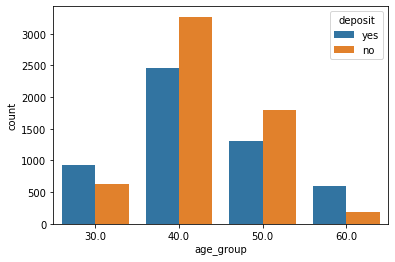

In [20]:
sns.countplot(x='age_group', data=df, hue='deposit')

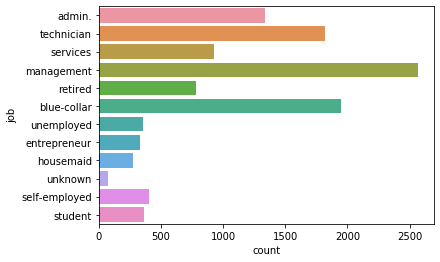

In [21]:
sns.countplot(y='job', data=df)

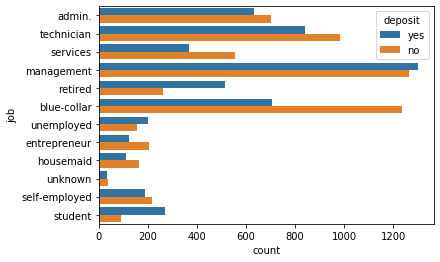

In [22]:
sns.countplot(y='job', data=df, hue='deposit')

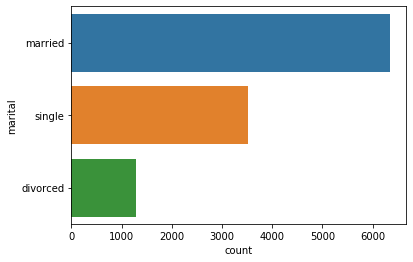

In [23]:
sns.countplot(y='marital', data=df)

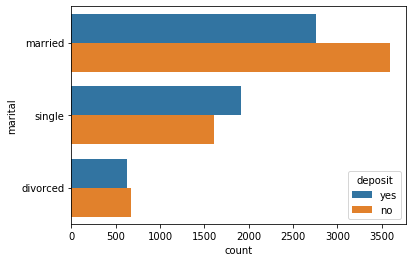

In [24]:
sns.countplot(y='marital', data=df, hue='deposit')

In [25]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

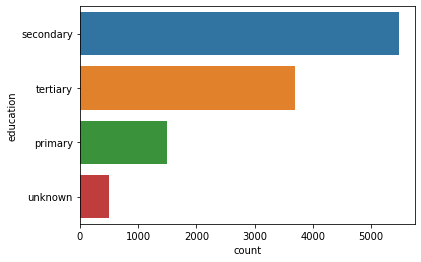

In [26]:
sns.countplot(y='education', data=df)

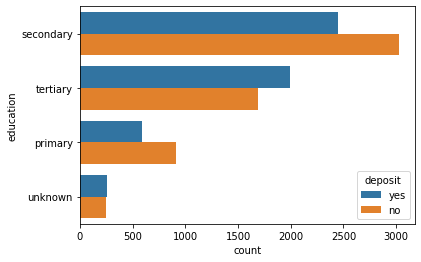

In [27]:
sns.countplot(y='education', data=df, hue='deposit')

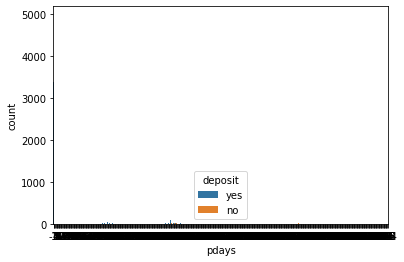

In [28]:
sns.countplot(x='pdays', data=df, hue='deposit')

In [29]:
df.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [30]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

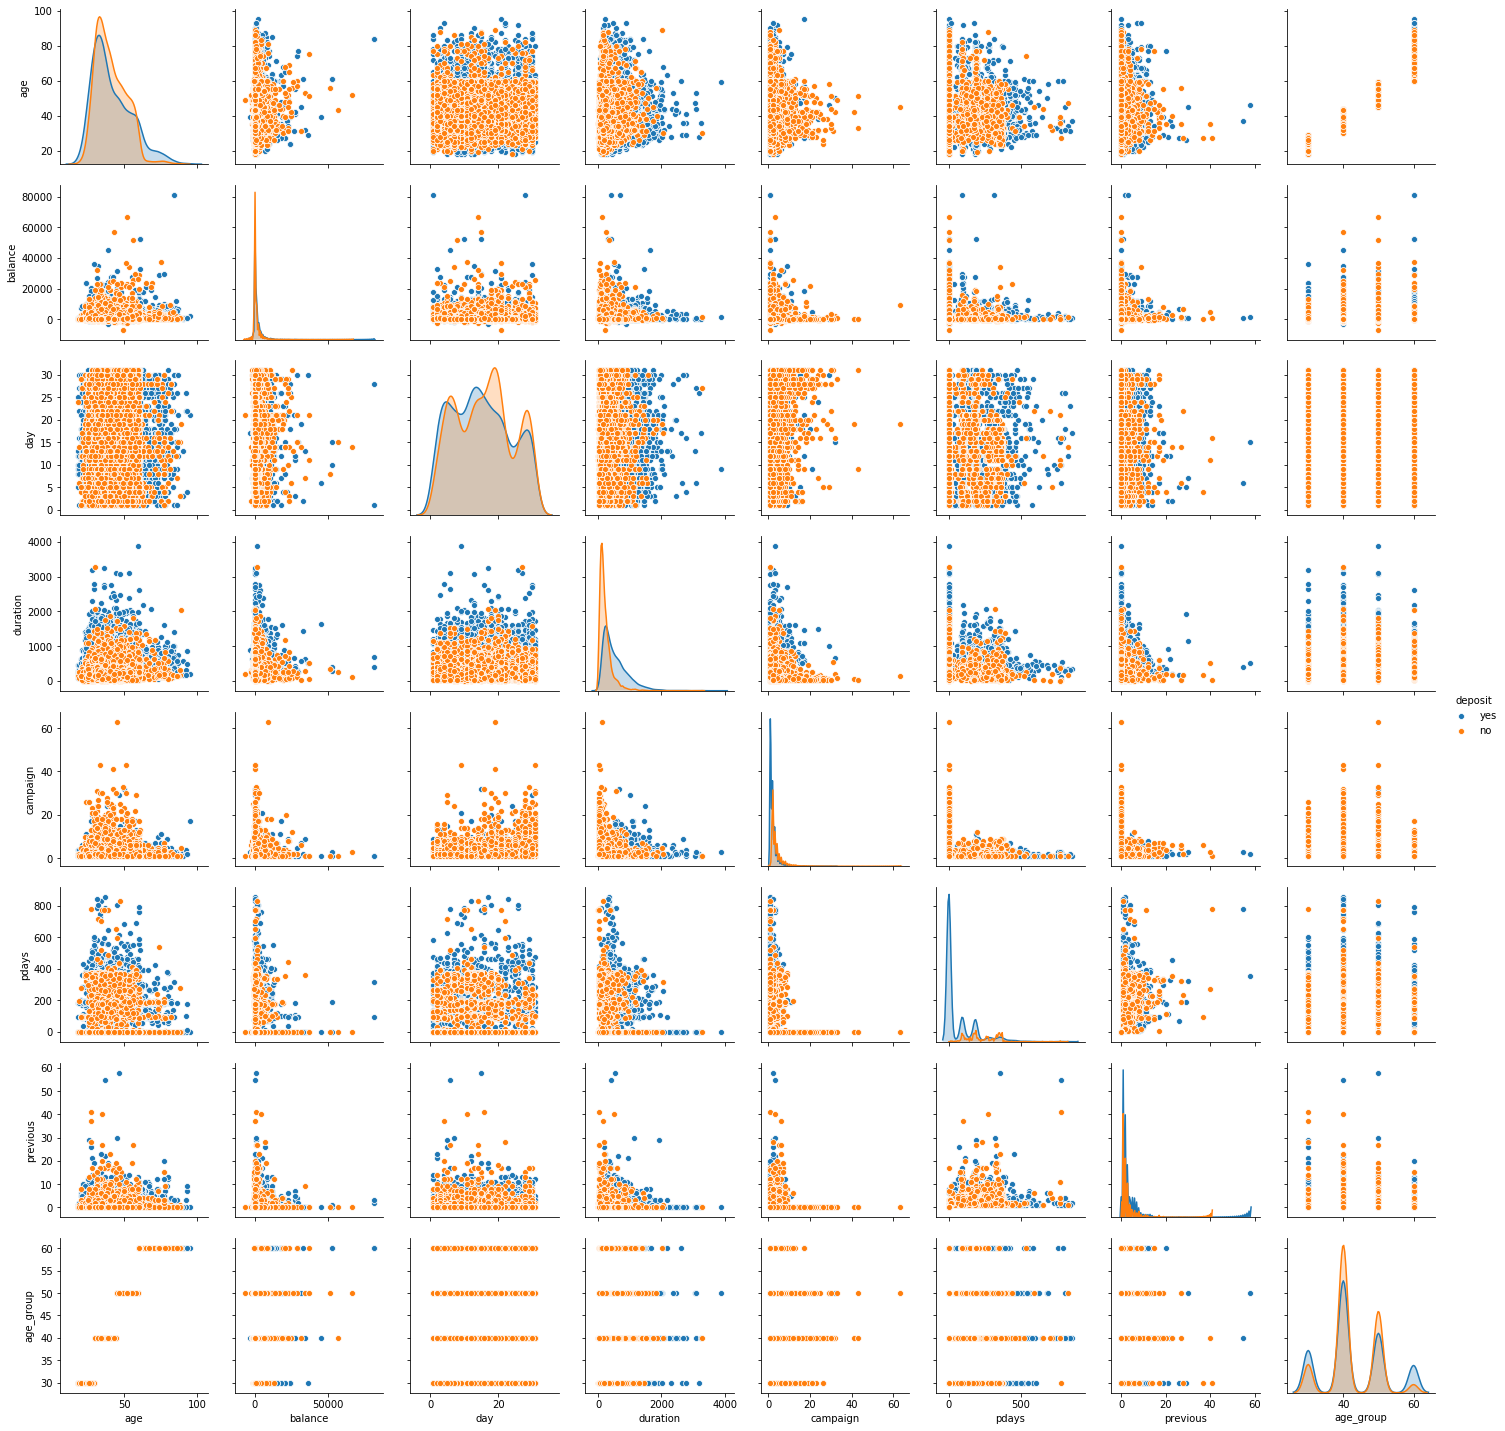

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(df, hue='deposit',diag_kind="kde")

In [32]:
df.drop('poutcome', axis=1, inplace=True)
df.drop('pdays', axis=1, inplace=True)

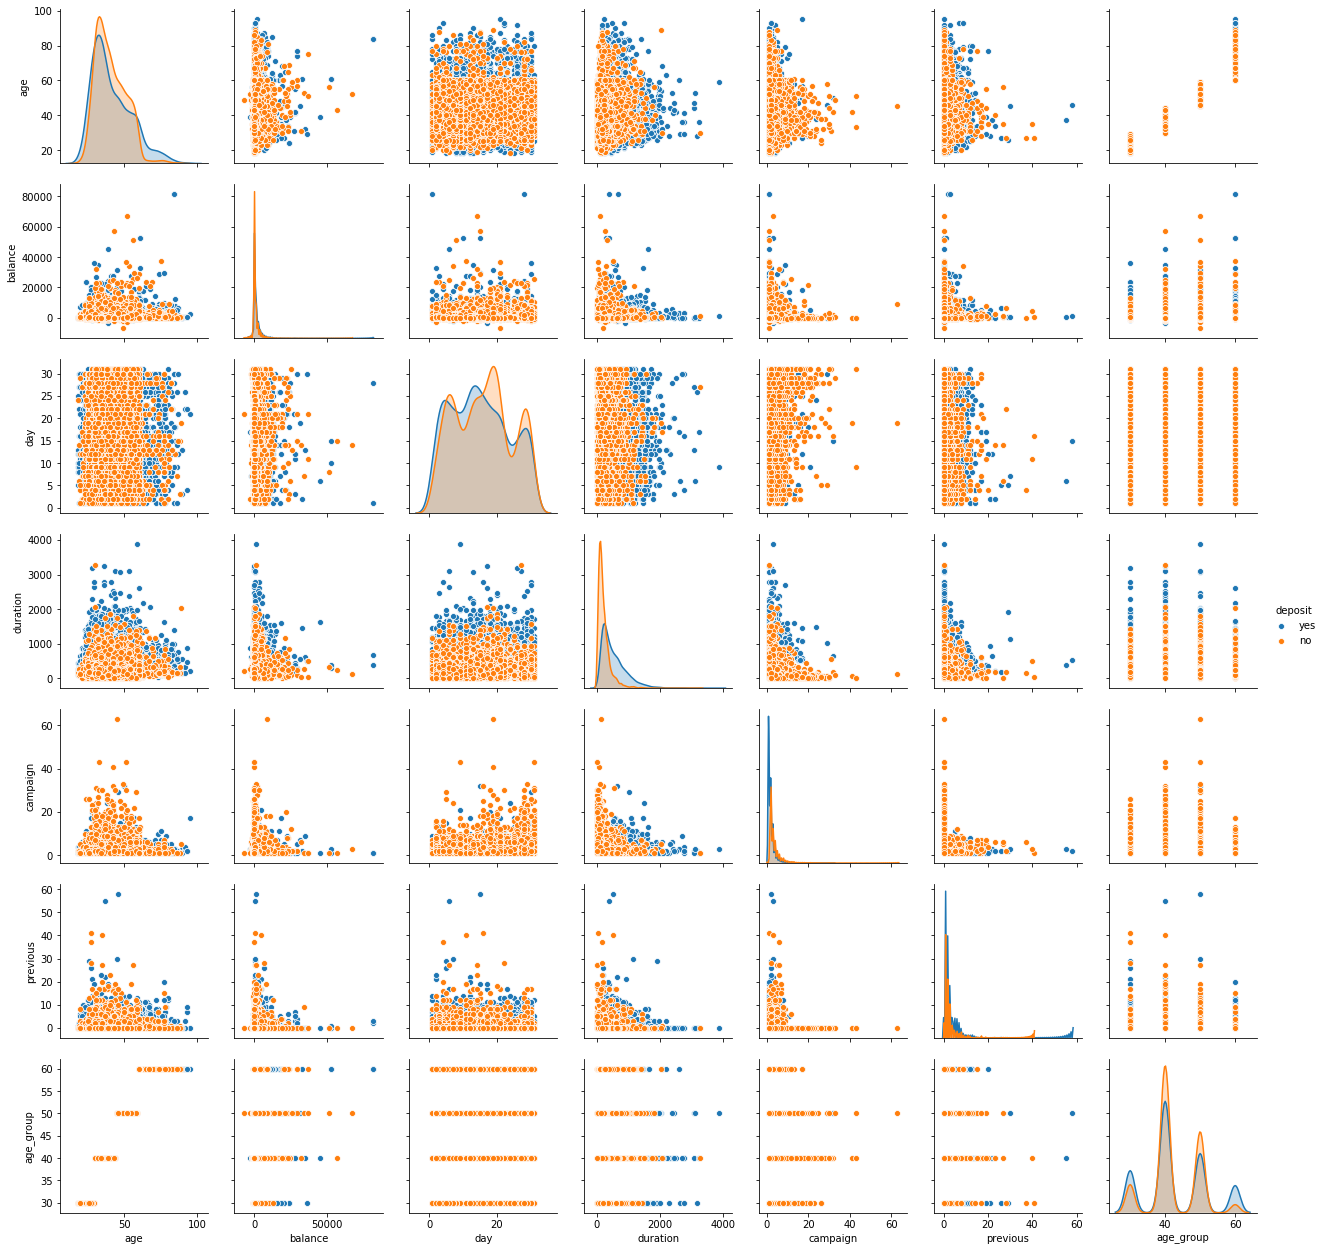

In [33]:
sb.pairplot(df, hue='deposit',diag_kind="kde")

In [34]:
le = preprocessing.LabelEncoder()

In [36]:
df.job = le.fit_transform(df.job)
df.marital= le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.deposit = le.fit_transform(df.deposit)

df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)

df.default = le.fit_transform(df.default)
df.contact = le.fit_transform(df.contact)
df.month = le.fit_transform(df.month)

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,deposit,age_group
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,1,50.0
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,1,50.0
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,1,40.0
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,1,50.0
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,1,50.0


In [49]:
x = df.iloc[:,0:14]


In [50]:
y = df.iloc[:,14]
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64


In [51]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8929, 14)
(8929,)
(2233, 14)
(2233,)


In [42]:
#Logistic regression

In [53]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

C:\Users\Szpilka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
prediction=logistic_regression.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)


0.780564263322884

In [55]:
prediction[0:50]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

[[965 240]
 [250 778]]


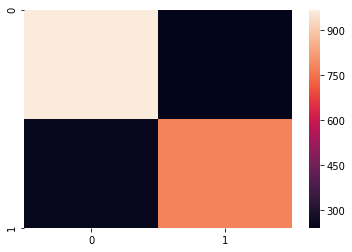

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)
import seaborn as sns;
sns.heatmap(confusion_matrix)

Incorrectly classified samples: 721
Accuracy: 0.677116 
[[685 520]
 [201 827]]


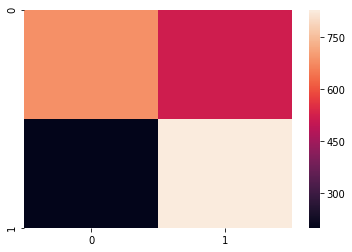

In [61]:
ppn = Perceptron(max_iter = 77, verbose=0, penalty="elasticnet", random_state = 1, tol=None)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
print('Incorrectly classified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %f '%accuracy_score(y_test.ravel(), y_pred))

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test.ravel(), y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix)


Confusion_matrix:
[[554 651]
 [ 53 975]]
Neural network model accuracy is 0.68


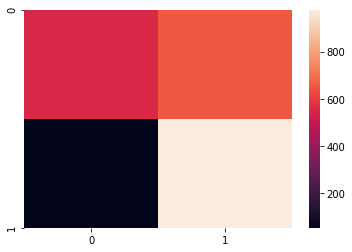

In [64]:
neural_network = MLPClassifier(hidden_layer_sizes=(200,100,50), activation = 'relu',\
                               solver = 'adam', random_state=1, verbose = False, learning_rate='adaptive')
neural_network.fit(x_train, y_train.ravel())

pr = neural_network.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix_neural_network = confusion_matrix(y_test.ravel(),pr)
print("Confusion_matrix:")
print(conf_matrix_neural_network)
import seaborn as sns;
sns.heatmap(conf_matrix_neural_network)
acc = accuracy_score(y_test.ravel(),pr)

print("Neural network model accuracy is {0:0.2f}".format(acc))

Confusion_matrix:
[[952 253]
 [208 820]]
Neural network model accuracy is 0.79


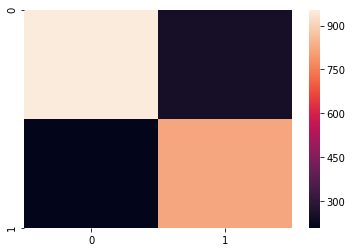

In [66]:
neural_network = MLPClassifier(hidden_layer_sizes=(40,40,40), activation = 'logistic',\
                               solver = 'adam',  random_state=1, verbose = False)
neural_network.fit(x_train, y_train.ravel())

pr = neural_network.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix_neural_network = confusion_matrix(y_test.ravel(),pr)
print("Confusion_matrix:")
print(conf_matrix_neural_network)
import seaborn as sns;
sns.heatmap(conf_matrix_neural_network)
acc = accuracy_score(y_test.ravel(),pr)

print("Neural network model accuracy is {0:0.2f}".format(acc))